<a href="https://colab.research.google.com/github/alhabibii/Project-only-For-Train/blob/main/Proyek_Analisis_Data_Adil_Latif_Habibi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Adil Latif Habibi
- Email: adillatif845@gmail.com
- Id Dicoding: alhabibii

## 1.Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak terjual dalam setahun terakhir?
- Customer dari daerah manakah yang melakukan pembelian terbanyak dalam setahun terakhir?
- Produk apa saja yang rata-rata penilaiannya mendapatkan skor > 4?
- Produk apa saja yang rata-rata penilaiannya mendapatkan skor < 4?
- Bagaimana distribusi pelanggan serta segmentasi loyalitas pelanggan yang ada pada Brazilian E-Commerce ini?

## 2.Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.Data Wrangling

### 3.1.Gathering Data

Load seluruh tabel menjadi dataframe menggunakan dictionary agar kode menjadi lebih ringkas

In [3]:
  data_paths = {
      'customers':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/customers_dataset.csv',
      'geolocation':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/geolocation_dataset.csv',
      'order_items':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/order_items_dataset.csv',
      'order_payments':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/order_payments_dataset.csv',
      'order_reviews':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/order_reviews_dataset.csv',
      'order_dataset':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/orders_dataset.csv',
      'product_category_name_translation':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/product_category_name_translation.csv',
      'product_dataset':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/products_dataset.csv',
      'seller_dataset':'/content/drive/MyDrive/Datasets/E-Commerce Public Dataset/sellers_dataset.csv'
  }

  dataframes = {key:pd.read_csv(path) for key, path in data_paths.items()}

Menampilkan 5 baris pertama dan terakhir dari masing-masing dataframe

In [4]:
for key, df in dataframes.items():
  print(f'***Menampilkan 5 baris pertama dan terakhir dari Dataframe {key}***')
  print("**"*100)
  display(df)
  print('\n')
  print('\n')

***Menampilkan 5 baris pertama dan terakhir dari Dataframe customers***
********************************************************************************************************************************************************************************************************


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS






***Menampilkan 5 baris pertama dan terakhir dari Dataframe geolocation***
********************************************************************************************************************************************************************************************************


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS






***Menampilkan 5 baris pertama dan terakhir dari Dataframe order_items***
********************************************************************************************************************************************************************************************************


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72






***Menampilkan 5 baris pertama dan terakhir dari Dataframe order_payments***
********************************************************************************************************************************************************************************************************


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54






***Menampilkan 5 baris pertama dan terakhir dari Dataframe order_reviews***
********************************************************************************************************************************************************************************************************


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13






***Menampilkan 5 baris pertama dan terakhir dari Dataframe order_dataset***
********************************************************************************************************************************************************************************************************


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00






***Menampilkan 5 baris pertama dan terakhir dari Dataframe product_category_name_translation***
********************************************************************************************************************************************************************************************************


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes






***Menampilkan 5 baris pertama dan terakhir dari Dataframe product_dataset***
********************************************************************************************************************************************************************************************************


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0






***Menampilkan 5 baris pertama dan terakhir dari Dataframe seller_dataset***
********************************************************************************************************************************************************************************************************


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### 3.2.Assessing Data

In [5]:
for key, df in dataframes.items():
  print(f'**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe {key}**')
  print('\n')
  display(df.info())
  print('\n')
  print(f'**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe {key}**')
  print('\n')
  display(df.isna().sum())
  print('\n')
  print(f'**memeriksa jika terdapat data duplikat dalam Dataframe {key}**')
  print('\n')
  display(print("Jumlah duplikasi: ", df.duplicated().sum()))
  print('\n')
  print(f'**menampilkan ringkasan parameter statistik dalam Dataframe {key}**')
  print('\n')
  display(df.describe())
  print('\n')
  print("**"*100)

**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe customers**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe customers**




customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe customers**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe customers**




,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe geolocation**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe geolocation**




geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe geolocation**


Jumlah duplikasi:  261831


None



**menampilkan ringkasan parameter statistik dalam Dataframe geolocation**




,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe order_items**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe order_items**




order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe order_items**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe order_items**




,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe order_payments**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe order_payments**




order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe order_payments**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe order_payments**




,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe order_reviews**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe order_reviews**




review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe order_reviews**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe order_reviews**




,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe order_dataset**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: objec

None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe order_dataset**




order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe order_dataset**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe order_dataset**




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe product_category_name_translation**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe product_category_name_translation**




product_category_name            0
product_category_name_english    0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe product_category_name_translation**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe product_category_name_translation**




,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe product_dataset**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm          

None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe product_dataset**




product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe product_dataset**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe product_dataset**




,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000




********************************************************************************************************************************************************************************************************
**memeriksa tipe data dari tiap kolom yang terdapat dalam Dataframe seller_dataset**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None



**menampilkan jumlah missing values yang terdapat dalam setiap kolom dalam Dataframe seller_dataset**




seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64



**memeriksa jika terdapat data duplikat dalam Dataframe seller_dataset**


Jumlah duplikasi:  0


None



**menampilkan ringkasan parameter statistik dalam Dataframe seller_dataset**




,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000




********************************************************************************************************************************************************************************************************


#### Informasi dan hasil analisis dari Assessing Data masing- masing Dataframe adalah :

<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-c3ow">Jumlah Baris dan Kolom </th>
    <th class="tg-c3ow">Tipe Data</th>
    <th class="tg-c3ow">Missing Value</th>
    <th class="tg-c3ow">Data Duplikat</th>
    <th class="tg-c3ow">Nilai Tidak Akurat</th>
    <th class="tg-c3ow">Keterangan</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">customers</td>
    <td class="tg-c3ow">99.441 baris dan 5 kolom</td>
    <td class="tg-c3ow">1 integer, 4 object</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">Pada ringkasan parameter statistik untuk customer_zip_code_prefix tidak memberikan makna apapun karena zip kode hanya merupakan sebuah kode berupa angka acak dan tidak bisa digunakan untuk operasi matematika apapun, dan tidak ditujukan untuk perhitungan. </td>
  </tr>
  <tr>
    <td class="tg-0pky">geolocation</td>
    <td class="tg-c3ow">1.000.000 baris dan 5 kolom</td>
    <td class="tg-c3ow">1 integer, 2 float, 2 object </td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">261.831</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">Karena merupakan data geolocation, maka asumsi sementara adalah karena ada pembeli yang sama yang order lebih dari satu kali sehingga terdapat data duplikasi</td>
  </tr>
  <tr>
    <td class="tg-0pky">order_items</td>
    <td class="tg-c3ow">112.650 baris dan 7 kolom</td>
    <td class="tg-c3ow">1 integer, 2 float, 4 object</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">Nilai-nilai parameter statistik untuk order_item_id tidak memberikan makna apapun karena angka-angka pada id hanya merupakan kode order saja</td>
  </tr>
  <tr>
    <td class="tg-0pky">order_payments</td>
    <td class="tg-c3ow">103.886 baris dan 5 kolom </td>
    <td class="tg-c3ow">2 integer, 1 float, 2 object</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-0pky">order_reviews</td>
    <td class="tg-c3ow">99.224 baris dan 7 kolom</td>
    <td class="tg-c3ow">1 integer, 6 object</td>
    <td class="tg-dvpl">review_comment_title : 87.656<br>review_comment_message : 58.247</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">Missing value terjadi karena customer tidak mengisi kolom judul dan pesan ketika melakukan review, tapi hanya memberikan skor</td>
  </tr>
  <tr>
    <td class="tg-0pky">order_datasets</td>
    <td class="tg-c3ow">99.441 baris dan 8 kolom</td>
    <td class="tg-c3ow">8 object</td>
    <td class="tg-dvpl">order_approved_at :&nbsp;&nbsp;160<br>order_delivered_carrier_date : 1783<br>order_delivered_customer_date : 2965</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">Untuk tanggal sebaiknya bertipe data datetime, tapi disini menggunakan object</td>
  </tr>
  <tr>
    <td class="tg-0pky">product_category_name_translation</td>
    <td class="tg-c3ow">71 baris dan 2 kolom </td>
    <td class="tg-c3ow">2 object</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-0pky">product_dataset</td>
    <td class="tg-c3ow">32.951 baris dan 9 kolom</td>
    <td class="tg-c3ow">7 float dan 2 object </td>
    <td class="tg-dvpl">product_category_name : 610<br>product_name_lenght : 610<br>product_description_length : 610<br>product_photos_qty : 610<br>product_weight_g : 2<br>product_length_cm : 2<br>product_height_cm : 2<br>product_width_cm : 2</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-0pky">seller_dataset</td>
    <td class="tg-c3ow">3095 baris dan 4 kolom</td>
    <td class="tg-c3ow">1 integer, 3 object</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">Pada ringkasan parameter statistik untuk seller_zip_code_prefix tidak memberikan makna apapun karena zip kode hanya merupakan sebuah kode berupa angka acak dan tidak bisa digunakan untuk operasi matematika apapun, dan tidak ditujukan untuk perhitungan.</td>
  </tr>
</tbody>
</table>

### 3.3.Cleaning Data

agar memudahkan menganalisa satu persatu dataset, kita uraikan dataframes yang berisi beberapa dataset tersebut menjadi variabel-variabel yang lebih mudah dituliskan, misalnya dari dataframes['customer'] menjadi customer saja

In [6]:
customers =  dataframes['customers']
geolocation =  dataframes['geolocation']
order_items =  dataframes['order_items']
order_payments =  dataframes['order_payments']
order_reviews =  dataframes['order_reviews']
order_dataset =  dataframes['order_dataset']
product_category =  dataframes['product_category_name_translation']
product_dataset =  dataframes['product_dataset']
seller_dataset =  dataframes['seller_dataset']

#### Melakukan analisa pada missing value

##### **3.3.1. Dataset order_reviews**

In [7]:
order_reviews[order_reviews.isnull().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Hasil analisa:
1. Terdapat Total 89.385 total baris yang memiliki missing value
1. Missing values pada dataset order_reviews tidak akan dilakukan dropping karena akan mengakibatkan terhapusnya data pada kolom lain pada baris yang sama dengan missing value tersebut. Sedangkan data tersebut akan berguna untuk menjawab pertanyaan bisnis ke-3 dan ke-4 pada project ini.
2. Tidak juga dilakukan imputasi dan interpolasi karena kolom review_comment_title dan kolom review_comment_message bertipe data object.
3. Kedua kolom yang memiliki mising values juga tidak diperlukan untuk menjawab pertanyaan bisnis pada project ini.


##### **3.3.2. Dataset order_dataset**

In [8]:
order_dataset[order_dataset.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Hasil analisa:

1. Terdapat total 2980 baris yang memiliki missing value
2. Missing value terdapat pada kolom-kolom yang tidak dibutuhkan/diperlukan untuk menjawab pertanyaan bisnis.
3. Jadi, untuk menghemat waktu, kita tidak akan melakukan tindakan apapun kepada ketiga kolom yang berisi missing value tersebut.

##### **3.3.3. Dataset product_dataset**

In [9]:
product_dataset[product_dataset.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


1. Dari 9 fitur pada product_dataset, terdapat 1 fitur yang tidak memiliki missing
value, yaitu product_id, dan 8 fitur yang memiliki missing value. Dari 8 fitur ada 1 fitur yang kita lakukan proses cleaning dataset yaitu kolom product_category_name. Sedangkan yang lainnya tidak kita perlukan untuk menjawab pertanyaan bisnis, jadi tidak kita lakukan tindakan apapun dalam proses data cleaning terhadap kolom tersebut.
2. Pada kolom product_category_name, terdapat missing value, yang artinya nama kategori pada produk tersebut tidak diisikan/terisi, sedangkan product_id hanya berisi id dari product, bukan nama sehingga produk tersebut akhirnya tidak bisa ditentukan masuk ke dalam kategori produk yang mana.
3. Solusi terbaik dari masalah ini adalah dengan **imputation/imputasi** dengan membuat kategori tersendiri untuk produk yang tidak memiliki kategori. Pada project ini, kategori tersebut akan dinamakan 'Uncategorized'

Menambahkan value/kategori baru bernama 'uncategorized'pada  product_category_name

In [10]:
product_dataset['product_category_name'].fillna('uncategorized', inplace=True)

melakukan pengecekan missing value kembali

In [11]:
product_dataset.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

bisa dilihat bahwa sudah tidak ada lagi missing value pada kolom product_category_name

## 4.Exploratory Data Analysis (EDA)

### 4.1.Explore product_dataset

#### 4.1.1.Merubah nama product_category_name pada dataset product_dataset menjadi bahasa inggris menggunakan dataset product_category

product_category_name pada dataset product_dataset berisi bahasa yang agak sulit dimengerti. Pada dataset product_category, terdapat translate dari kategori produk-produk dalam bahasa inggris. Oleh karena itu, pertama kita perlu perbaharui dataset product_dataset, dengan cara merubah kategori tersebut dengan bahasa inggris menggunakan dataset product_category_name_translation

In [12]:
product_dataset_trans = pd.merge(product_dataset,product_category, on='product_category_name')
product_dataset_trans.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8540,5679959ac1f0086ba80e4c6cdae363a3,moveis_decoracao,63.0,181.0,2.0,5300.0,100.0,7.0,90.0,furniture_decor
495,1cc5f038fa8645580602fb2423d3a50a,perfumaria,56.0,681.0,1.0,400.0,22.0,16.0,16.0,perfumery
28567,e3e6b07f8e08fc8862ab0fcaf76dbde4,construcao_ferramentas_construcao,59.0,342.0,2.0,150.0,20.0,6.0,20.0,construction_tools_construction
7951,c0cd5acdd53e22c35108d81c51a0c158,cool_stuff,56.0,125.0,1.0,1300.0,20.0,20.0,40.0,cool_stuff
25235,904df51afc994cd2a7bce1ec3ff5d9fe,papelaria,43.0,216.0,2.0,150.0,24.0,7.0,14.0,stationery


menghapus product_category_name dan menggantikan urutan posisinya dengan product_category_name_english

In [13]:
product_dataset_trans = product_dataset_trans.drop(columns=['product_category_name'])
product_dataset_trans = product_dataset_trans[['product_id', 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
product_dataset = product_dataset_trans
product_dataset.sample(5)


,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10172,114cf6e338f90a48f7fae837c70e8325,furniture_decor,26.0,304.0,1.0,2400.0,37.0,30.0,20.0
5382,cb0fe29b88df5b43cb3d434b6b0e8db4,housewares,31.0,909.0,4.0,1525.0,65.0,10.0,25.0
11809,c3c63b6c88b27cb29ec5d26fb0ab7182,toys,56.0,923.0,3.0,19500.0,45.0,50.0,45.0
15928,2d4b08af04c0467f37569071672ce199,computers_accessories,46.0,1228.0,5.0,150.0,28.0,14.0,14.0
15252,7b49e585ac8c80b14c9b2815d4db465f,bed_bath_table,26.0,421.0,1.0,200.0,16.0,12.0,11.0


#### 4.1.2.Melihat berapa banyak kategori produk

In [14]:
display(product_dataset['product_category_name_english'].unique())
print('Jumlah kategory semua produk adalah : ', product_dataset['product_category_name_english'].nunique())

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

Jumlah kategory semua produk adalah :  71


### 4.2.Explore order_items

#### 4.2.1.rangkuman parameter statistik dari data order_items

In [15]:
order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### 4.2.2.Menggabungkan order_items dengan product_dataset untuk melihat kategori product yang paling banyak diorder

In [16]:
order_items_new = pd.merge(order_items, product_dataset, on='product_id')
order_items_new = order_items_new[['order_id', 'order_item_id', 'product_id', 'product_category_name_english', 'price', 'freight_value', 'seller_id', 'shipping_limit_date']]
order_items_new

,order_id,order_item_id,product_id,product_category_name_english,price,freight_value,seller_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,13.29,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,55.9,17.96,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,64.9,18.33,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,16.17,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,13.29,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11
...,...,...,...,...,...,...,...,...
111018,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,garden_tools,129.9,51.20,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55
111019,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,furniture_decor,99.0,13.52,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11
111020,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,watches_gifts,736.0,20.91,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23
111021,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,sports_leisure,229.9,44.02,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42


In [17]:
most_ordered = order_items_new['product_category_name_english'].value_counts()
print("Berikut adalah daftar 10 kategori produk yang paling banyak diorder :")
display(most_ordered.head(10))
print('*'*60)
print("Berikut adalah daftar 10 kategori produk yang paling sedkit diorder :")
most_ordered.tail(10)

Berikut adalah daftar 10 kategori produk yang paling banyak diorder :


bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name_english, dtype: int64

************************************************************
Berikut adalah daftar 10 kategori produk yang paling sedkit diorder :


furniture_mattress_and_upholstery    38
music                                38
flowers                              33
home_comfort_2                       30
fashion_sport                        30
arts_and_craftmanship                24
cds_dvds_musicals                    14
la_cuisine                           14
fashion_childrens_clothes             8
security_and_services                 2
Name: product_category_name_english, dtype: int64

#### 4.2.3. Mencari informasi terkait produk berdasarkan kategori produk, dan id seller

In [18]:
order_items_new.groupby(by='product_category_name_english').agg({
    'product_id':'sum',
    'seller_id':'nunique',
    'price':['min','max']
})

product_id  \
                                                                             sum   
product_category_name_english                                                      
agro_industry_and_commerce     672e757f331900b9deea127a2a7b79fd672e757f331900...   
air_conditioning               525f8fbde09c9bf777025c3141fbbc6e525f8fbde09c9b...   
art                            4fe644d766c7566dbc46fb851363cb3b4fe644d766c756...   
arts_and_craftmanship          43506d2b6b5e0535079f88c7dc51c4de4a24717893a6c8...   
audio                          e6b6e13cf71449a457269f425b89dc74e6b6e13cf71449...   
...                                                                          ...   
stationery                     a6f449f6257f26e556013151cee46b4b28a652ff04e43c...   
tablets_printing_image         6bbe55cf8f85c87b6eebb775a53402f46bbe55cf8f85c8...   
telephony                      8d4f2bb7e93e6710a28f34fa83ee7d288d4f2bb7e93e67...   
toys                           01c666c82f414c762ad21bffa56e8b49880be32f4db1d9...   
watches_gifts                  41402af2a88247152583bb812ba235dd4bc3ab2ff01688...   

                              seller_id  price           
                                nunique    min      max  
product_category_name_english                            
agro_industry_and_commerce           34  12.99  2990.00  
air_conditioning                     52  10.90  1599.00  
art                                  36   3.50  6499.00  
arts_and_craftmanship                13   9.80   289.49  
audio                                36  14.90   598.99  
...                                 ...    ...      ...  
stationery                          173   2.29  1693.00  
tablets_printing_image                6  14.90   889.99  
telephony                           149   5.00  2428.00  
toys                                252   4.90  1699.99  
watches_gifts                       101   8.99  3999.90  

[71 rows x 4 columns]

In [19]:
order_items_new.groupby(by='seller_id').agg({
    'product_id':'nunique',
    'product_category_name_english':'nunique',
    'price':['median', 'min','max']
})

product_id product_category_name_english  \
                                    nunique                       nunique   
seller_id                                                                   
0015a82c2db000af6aaaf3ae2ecb0532          1                             1   
001cca7ae9ae17fb1caed9dfb1094831         11                             2   
001e6ad469a905060d959994f1b41e4f          1                             1   
002100f778ceb8431b7a1020ff7ab48f         24                             1   
004c9cd9d87a3c30c522c48c4fc07416         79                             1   
...                                     ...                           ...   
ffcfefa19b08742c5d315f2791395ee5          1                             1   
ffdd9f82b9a447f6f8d4b91554cc7dd3         12                             2   
ffeee66ac5d5a62fe688b9d26f83f534          3                             1   
fffd5413c0700ac820c7069d66d98c89         29                             3   
ffff564a4f9085cd26170f4732393726         14                             6   

                                    price                  
                                   median     min     max  
seller_id                                                  
0015a82c2db000af6aaaf3ae2ecb0532  895.000  895.00  895.00  
001cca7ae9ae17fb1caed9dfb1094831   99.000   69.90  199.00  
001e6ad469a905060d959994f1b41e4f  250.000  250.00  250.00  
002100f778ceb8431b7a1020ff7ab48f   17.900    9.90  129.90  
004c9cd9d87a3c30c522c48c4fc07416  107.495   47.90  259.99  
...                                   ...     ...     ...  
ffcfefa19b08742c5d315f2791395ee5   69.900   69.90   69.90  
ffdd9f82b9a447f6f8d4b91554cc7dd3   99.000   13.00  214.00  
ffeee66ac5d5a62fe688b9d26f83f534  129.990   89.99  149.99  
fffd5413c0700ac820c7069d66d98c89  122.300   39.80  636.00  
ffff564a4f9085cd26170f4732393726   51.475   11.50  366.50  

[3033 rows x 5 columns]

### 4.3.Explore geolocation

#### 4.3.1.melihat berapa banyak nunique kode pos pada geolocation

In [20]:
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [21]:
print('Banyaknya kode pos pada dataset geolocation : ', geolocation['geolocation_zip_code_prefix'].nunique())
print('Banyaknya kota pada dataset geolocation : ', geolocation['geolocation_city'].nunique())
print('Banyaknya state pada dataset geolocation : ', geolocation['geolocation_state'].nunique())

Banyaknya kode pos pada dataset geolocation :  19015
Banyaknya kota pada dataset geolocation :  8011
Banyaknya state pada dataset geolocation :  27


#### 4.3.2.Melihat apa saja state yang ada pada dataset geolocation

In [22]:
display(geolocation['geolocation_state'].unique())
geolocation.groupby(by='geolocation_state').agg({
    'geolocation_city':'nunique',
    'geolocation_zip_code_prefix':'nunique'
})

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

,geolocation_city,geolocation_zip_code_prefix
geolocation_state,,
AC,34,46
AL,130,178
AM,74,144
AP,17,26
BA,652,992
CE,260,548
DF,28,516
ES,160,315
GO,384,773


### 4.4.Explore customer

In [23]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


#### 4.4.1.Melihat nunique dari masing-masing variabel

In [24]:
print('Banyaknya customer pada dataset customers : ', customers['customer_id'].nunique())
print('Banyaknya kode pos pada dataset customers : ', customers['customer_zip_code_prefix'].nunique())
print('Banyaknya kota pada dataset customers : ', customers['customer_city'].nunique())
print('Banyaknya state pada dataset customers : ', customers['customer_state'].nunique())

Banyaknya customer pada dataset customers :  99441
Banyaknya kode pos pada dataset customers :  14994
Banyaknya kota pada dataset customers :  4119
Banyaknya state pada dataset customers :  27


#### 4.4.2.Melihat customer_id, nunique kode pos dan customer_city berdasarkan customer_state

In [25]:
customers.groupby(by='customer_state').agg({
    'customer_id':'nunique',
    'customer_city':'nunique',
    'customer_zip_code_prefix':'nunique'
})

,customer_id,customer_city,customer_zip_code_prefix
customer_state,,,
AC,81,8,20
AL,413,68,126
AM,148,5,55
AP,68,6,18
BA,3380,353,735
CE,1336,161,384
DF,2140,6,465
ES,2033,95,265
GO,2020,178,540


#### 4.4.4.Analisis

Ternyata jumlah kode pos pada dataset customer dan dataset geolocation berbeda. terdapat lebih banyak kode pos pada dataset geolocation. analisisnya adalah :
1. Dataset geolocation mungkin mencakup wilayah yang lebih luas atau mencakup lebih banyak kode pos daripada yang ada dalam dataset customer.
2. Sumber data geolocation bisa mencakup informasi yang dikumpulkan dari berbagai sumber, sementara data customer mungkin berasal dari pelanggan yang terbatas.
3. Dataset geolocation mungkin telah melalui proses pemrosesan yang lebih luas atau agregasi yang menghasilkan lebih banyak kode pos yang unik. Data customer mungkin tidak melalui pemrosesan serupa.

untuk mengetahui jumlah perbedaan kode pos yang terdata pada geolocation dan kode pos pada customers :

In [26]:
kodeposcustomer = customers['customer_zip_code_prefix'].nunique()
kodeposogeolocation = geolocation['geolocation_zip_code_prefix'].nunique()
perbedaankodepos =  kodeposogeolocation - kodeposcustomer
print('Jumlah perbedaan kode pos antara dataset geolocation dan customers :', perbedaankodepos)

Jumlah perbedaan kode pos antara dataset geolocation dan customers : 4021


Kesimpulan : Terdapat 4021 wilayah dengan kode pos berbeda yang tidak memiliki customer di wilayah kode pos tersebut

### 4.5.Explore order_dataset

In [27]:
order_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


#### 4.5.1.Melihat apa saja order_status pada order_dataset

In [28]:
display(order_dataset['order_status'].nunique())
display(order_dataset['order_status'].unique())

8

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

#### 4.5.2.Melihat berapa banyak status masing-masing order

In [29]:
display(order_dataset['order_status'].value_counts())
display(order_dataset['order_id'].value_counts().sum())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

99441

Dari 99441 order yang terjadi, ternyata hanya 96478 order yang delivered.

### 4.6.Explore dataset order_reviews

In [30]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


#### 4.6.1.Melihat apa saja score yang tersedia dan jumlah masing-masingnya

In [31]:
display(order_reviews['review_score'].value_counts())
display(order_reviews['review_score'].value_counts().sum())
display(order_reviews.info())

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

99224

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

## 5.Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak terjual dalam setahun terakhir?

Mengambil orderan yang hanya memiliki status 'delivered' saja pada dataset order_dataset

In [32]:
  order_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [33]:
order_dataset_delivered = order_dataset[['order_id', 'order_status', 'order_purchase_timestamp', 'customer_id']]
order_dataset_delivered = order_dataset_delivered[order_dataset_delivered['order_status']=='delivered']
order_dataset_delivered['order_status'].value_counts()

delivered    96478
Name: order_status, dtype: int64

Mengubah tipe data order_purchase_timestamp dari object ke datetime

In [34]:
order_dataset_delivered['order_purchase_timestamp'] = pd.to_datetime(order_dataset_delivered['order_purchase_timestamp'])
order_dataset_delivered.head(2)

,order_id,order_status,order_purchase_timestamp,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef


mengambil Tanggal saja dari order_purchase_timestamp, dan menghilangkan Jam, Menit, serta Detik

In [35]:
order_dataset_delivered['order_purchase_timestamp'] = order_dataset_delivered['order_purchase_timestamp'].dt.date
order_dataset_delivered.head(2)

,order_id,order_status,order_purchase_timestamp,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24,b0830fb4747a6c6d20dea0b8c802d7ef


Mengambil kolom order_id, product_id, dan product_category_name_english dari order_items_new

In [36]:
order_items_new = order_items_new[['order_id', 'product_id', 'product_category_name_english']]
order_items_new.sample(2)

,order_id,product_id,product_category_name_english
107950,dd4cd6ebc3cef5658a5a0b35c7d5e417,3025eab6cff12d116410978c3e5fa860,furniture_decor
103563,b5d9197eb2402184f5661ee98acf0271,c3910fee8ac77d2fd4e39a0aa2e0b506,books_general_interest


menyeleksi dan menyamakan order id kedua dataset berdasarkan order_id pada order_dataset_delivered

In [37]:
merged_order = pd.merge(order_dataset_delivered, order_items_new[['order_id', 'product_id', 'product_category_name_english']], on='order_id', how='inner')
display(merged_order.info())
print('Jumlah mising values adalah : ', merged_order['order_status'].isna().sum())
merged_order = merged_order[['order_id', 'product_id', 'product_category_name_english', 'customer_id', 'order_purchase_timestamp', 'order_status']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108638 entries, 0 to 108637
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       108638 non-null  object
 1   order_status                   108638 non-null  object
 2   order_purchase_timestamp       108638 non-null  object
 3   customer_id                    108638 non-null  object
 4   product_id                     108638 non-null  object
 5   product_category_name_english  108638 non-null  object
dtypes: object(6)
memory usage: 5.8+ MB


None

Jumlah mising values adalah :  0


mengurutkan order_purchase_timestamp berdasarkan waktu terbaru

In [38]:
merged_order = merged_order.sort_values(by='order_purchase_timestamp', ascending=False)
merged_order.head(20)

,order_id,product_id,product_category_name_english,customer_id,order_purchase_timestamp,order_status
76051,03ef5dedbe7492bdae72eec50764c43f,c7f27c5bef2338541c772b5776403e6a,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29,delivered
108562,52018484704db3661b98ce838612b507,777798445efd625458a90c13f3b3e6e7,toys,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29,delivered
40597,c84d88553f9878bf2c7ecda2eb211ece,24bc2932a12c983f8e76d828b65cf39b,health_beauty,c4c66f47534e09a03fc7a878a9eda5ea,2018-08-29,delivered
81573,fb393211459aac00af932cd7ab4fa2cc,b6b76b074ed0d77d0f3443b12d8adb5e,watches_gifts,54365416b7ef5599f54a6c7821d5d290,2018-08-29,delivered
6254,d70442bc5e3cb7438da497cc6a210f80,9a8706b8c060b16e5f0d2925f20bc35b,sports_leisure,10a79ef2783cae3d8d678e85fde235ac,2018-08-29,delivered
7494,bee12e8653a04e76786e8891cfb6330a,8d4dac6177fb8134f26fb4c5cc6c0aff,health_beauty,448945bc713d98b6726e82eda6249b9e,2018-08-29,delivered
7493,bee12e8653a04e76786e8891cfb6330a,8d4dac6177fb8134f26fb4c5cc6c0aff,health_beauty,448945bc713d98b6726e82eda6249b9e,2018-08-29,delivered
7492,bee12e8653a04e76786e8891cfb6330a,8d4dac6177fb8134f26fb4c5cc6c0aff,health_beauty,448945bc713d98b6726e82eda6249b9e,2018-08-29,delivered
7491,bee12e8653a04e76786e8891cfb6330a,8d4dac6177fb8134f26fb4c5cc6c0aff,health_beauty,448945bc713d98b6726e82eda6249b9e,2018-08-29,delivered
96475,912859fef5a0bd5059b6d48fa79d121a,9865c67a74684715521d1e70226cce0b,watches_gifts,b8c19e70d00f6927388e4f31c923d785,2018-08-29,delivered


Tanggal terlama dan dan tanggal terbaru dalam dataset

In [39]:
print('Tanggal terlama adalah :', merged_order['order_purchase_timestamp'].min())
print('Tanggal terbaru adalah :', merged_order['order_purchase_timestamp'].max())

Tanggal terlama adalah : 2016-09-15
Tanggal terbaru adalah : 2018-08-29


menghitung dan menyortir data satu tahun terakhir sebelum tanggal 2018-08-29 ( 2017-08-29 sampai 2018-08-29 )

In [40]:
latest_date = merged_order['order_purchase_timestamp'].max()
one_year_ago = latest_date - pd.DateOffset(years=1)
one_year_ago_filtered = merged_order[merged_order['order_purchase_timestamp']>= one_year_ago]
one_year_ago_filtered.tail(2)

<ipython-input-40-2fc7802a3029>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  one_year_ago_filtered = merged_order[merged_order['order_purchase_timestamp']>= one_year_ago]


,order_id,product_id,product_category_name_english,customer_id,order_purchase_timestamp,order_status
84268,164f9ed9263550111efa1a5518d97dfb,7703b8cb5b77fbb36518ea91e2ca734f,watches_gifts,816c892100403472a6c27c4256729d4b,2017-08-29,delivered
13000,2ca97597bd5b2e4c419dccd661439910,7506f10f7460992e59f979011541e00e,bed_bath_table,d8182d3b7072af3e484473ccf2b7a6ca,2017-08-29,delivered


Mengurutkan berdasarkan kateogori produk dan menghitung order masing-masing kategori

In [41]:
category_order = one_year_ago_filtered.groupby('product_category_name_english')['order_id'].count().reset_index()
category_order = category_order.sort_values(by='order_id', ascending=False)
category_order

,product_category_name_english,order_id
7,bed_bath_table,8426
43,health_beauty,7645
65,sports_leisure,6466
15,computers_accessories,5999
39,furniture_decor,5956
...,...,...
32,fashion_sport,14
52,la_cuisine,6
11,cds_dvds_musicals,6
29,fashion_childrens_clothes,5


Menampilkan dalam grafik/plot Kategori Produk terbanyak diorder dalam 1 tahun terakhir

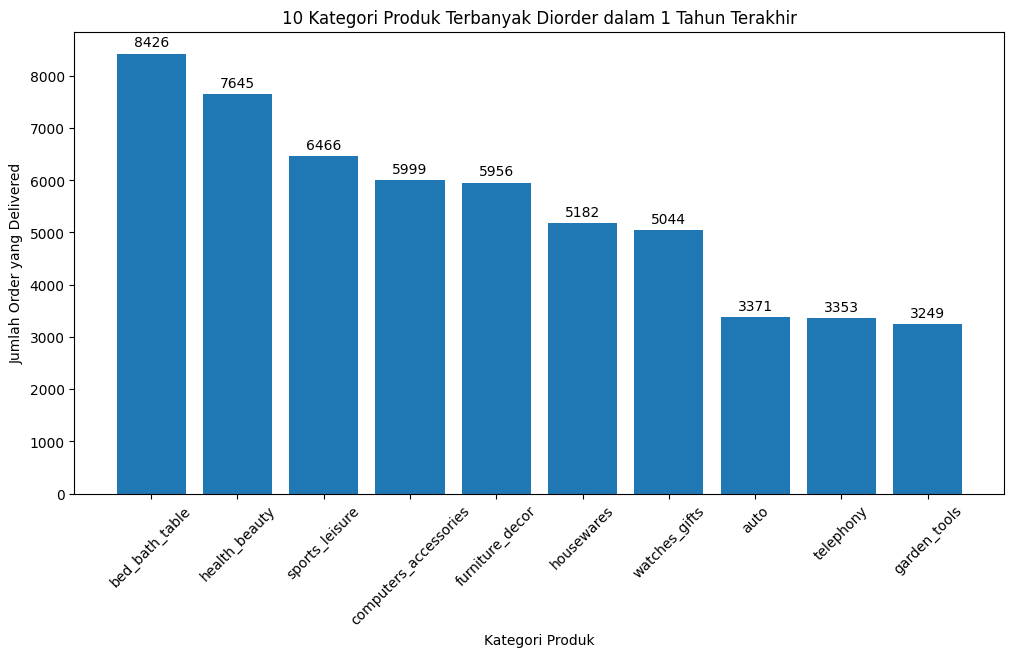

In [42]:
plt.figure(figsize=(12,6))
bars = plt.bar(category_order['product_category_name_english'][:10], category_order['order_id'][:10])
plt.xlabel("Kategori Produk")
plt.ylabel('Jumlah Order yang Delivered')
plt.title('10 Kategori Produk Terbanyak Diorder dalam 1 Tahun Terakhir')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Jarak label dari bar
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

Menampilkan Grafik tren harian penjualan dalam 1 tahun terakhir

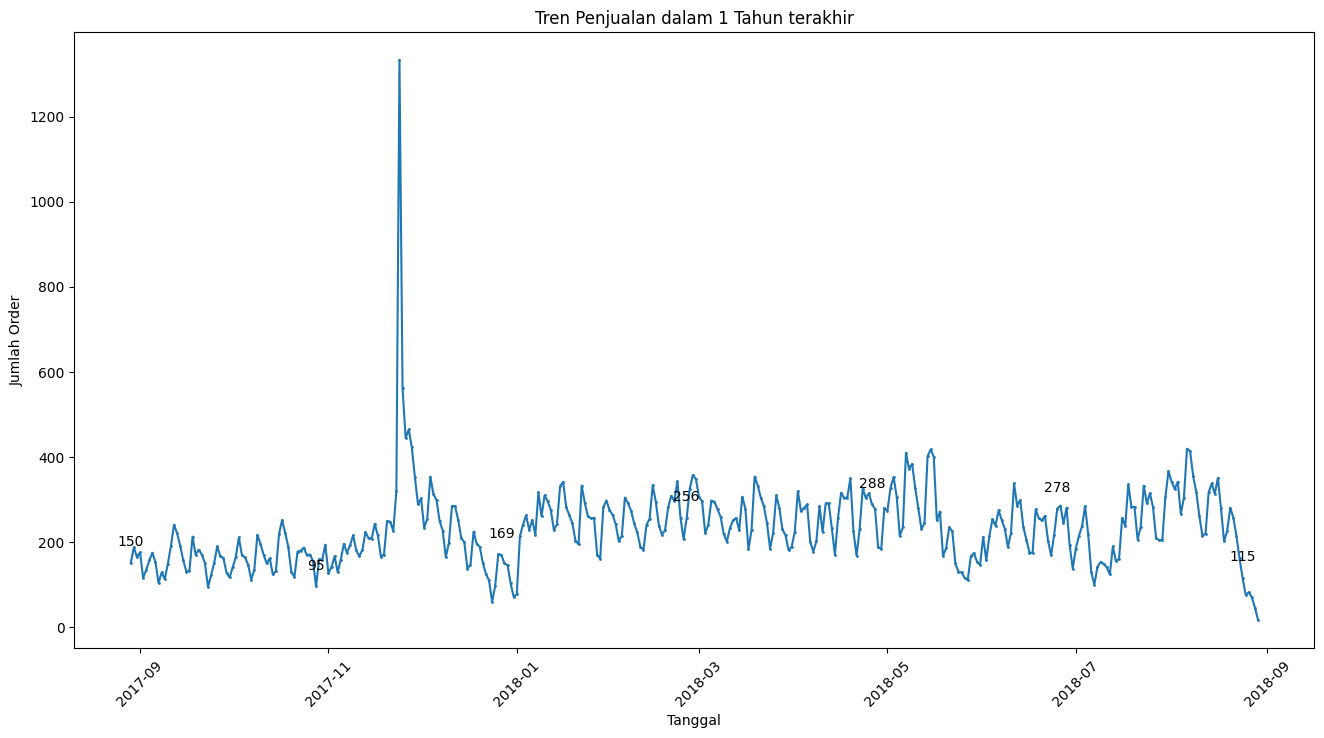

In [43]:
daily_sales = one_year_ago_filtered.groupby(one_year_ago_filtered['order_purchase_timestamp'])['order_id'].count()

plt.figure(figsize=(16,8))
plt.plot(daily_sales.index, daily_sales.values, marker='o', markersize=1, linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Order')
plt.title('Tren Penjualan dalam 1 Tahun terakhir')
plt.xticks(rotation=45)
label_points = [0, 60, 120, 180, 240, 300, 360]
for i in label_points:
    plt.annotate(f'{daily_sales.values[i]}',
                 (daily_sales.index[i], daily_sales.values[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center', va='bottom')
plt.show()

### Pertanyaan 2: Customer dari 'State' manakah yang melakukan pembelian terbanyak dalam setahun terakhir?

menggabungkan dataset customers dengan one_year_ago

In [44]:
display(customers.head(2))
print('*'*60)
one_year_ago_filtered.info()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84364 entries, 76051 to 13000
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       84364 non-null  object
 1   product_id                     84364 non-null  object
 2   product_category_name_english  84364 non-null  object
 3   customer_id                    84364 non-null  object
 4   order_purchase_timestamp       84364 non-null  object
 5   order_status                   84364 non-null  object
dtypes: object(6)
memory usage: 4.5+ MB


In [45]:
customer_one_year = pd.merge(one_year_ago_filtered, customers, on='customer_id')
customer_one_year.head(2)

,order_id,product_id,product_category_name_english,customer_id,order_purchase_timestamp,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,03ef5dedbe7492bdae72eec50764c43f,c7f27c5bef2338541c772b5776403e6a,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29,delivered,b701bebbdf478f5500348f03aff62121,9541,sao caetano do sul,SP
1,52018484704db3661b98ce838612b507,777798445efd625458a90c13f3b3e6e7,toys,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29,delivered,7a22d14aa3c3599238509ddca4b93b01,5863,sao paulo,SP


In [46]:
print('Tanggal terlama :', customer_one_year['order_purchase_timestamp'].min())
print('Tanggal terbaru :', customer_one_year['order_purchase_timestamp'].max())

Tanggal terlama : 2017-08-29
Tanggal terbaru : 2018-08-29


In [47]:
customer_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84364 entries, 0 to 84363
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       84364 non-null  object
 1   product_id                     84364 non-null  object
 2   product_category_name_english  84364 non-null  object
 3   customer_id                    84364 non-null  object
 4   order_purchase_timestamp       84364 non-null  object
 5   order_status                   84364 non-null  object
 6   customer_unique_id             84364 non-null  object
 7   customer_zip_code_prefix       84364 non-null  int64 
 8   customer_city                  84364 non-null  object
 9   customer_state                 84364 non-null  object
dtypes: int64(1), object(9)
memory usage: 7.1+ MB


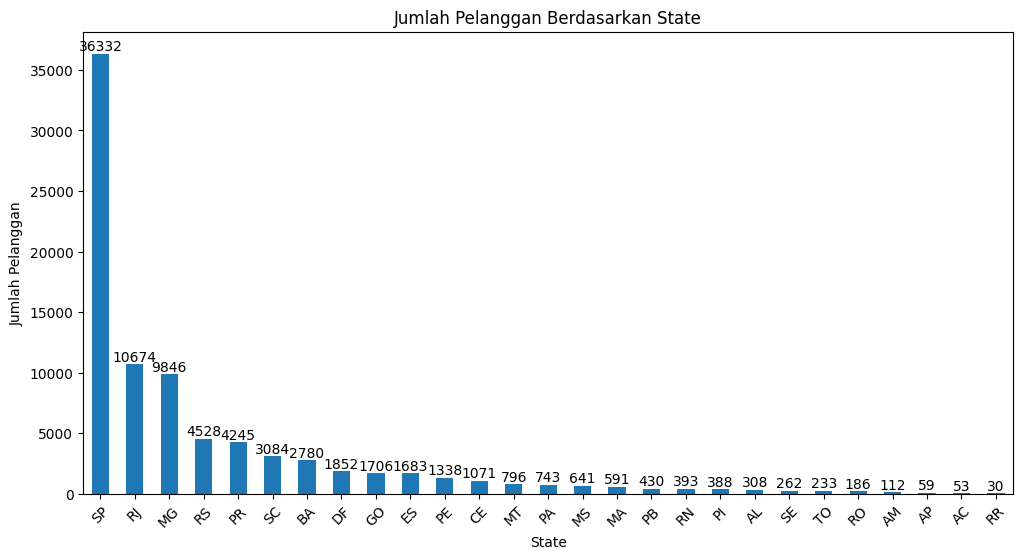

In [48]:
customer_one_year_grouped = customer_one_year['customer_state'].value_counts()
plt.figure(figsize=(12, 6))
ax = customer_one_year_grouped.plot(kind='bar')
plt.title('Jumlah Pelanggan Berdasarkan State')
plt.xlabel('State')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
for i, v in enumerate(customer_one_year_grouped):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

### Pertanyaan 3: Produk apa saja yang rata-rata penilaiannya mendapatkan skor > 4?

In [49]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [50]:
merged_review = pd.merge(one_year_ago_filtered, order_reviews, on='order_id')
merged_review.head(2)

,order_id,product_id,product_category_name_english,customer_id,order_purchase_timestamp,order_status,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,03ef5dedbe7492bdae72eec50764c43f,c7f27c5bef2338541c772b5776403e6a,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29,delivered,8a8ebb5019795478156fa952acd050b1,3,Recomendo,NaN,2018-08-31 00:00:00,2018-08-31 20:02:48
1,52018484704db3661b98ce838612b507,777798445efd625458a90c13f3b3e6e7,toys,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29,delivered,7a11bf826668febba0800ec35884958c,1,Muito frágil !!!,"Achei o produto muito pequeno e onde fica a ""t...",2018-08-31 00:00:00,2018-09-21 13:54:38


Menghitung rata-rata penilaian (review_score) per produk

In [51]:
average_scores = merged_review.groupby('product_category_name_english')['review_score'].mean()

Memfilter produk dengan rata-rata penilaian > 4 dan Menampilkan produk-produk yang memenuhi kriteria

In [52]:
highly_rated_products = average_scores[average_scores > 4]
highly_rated_products = highly_rated_products.sort_values(ascending=True)

Membuat grafik

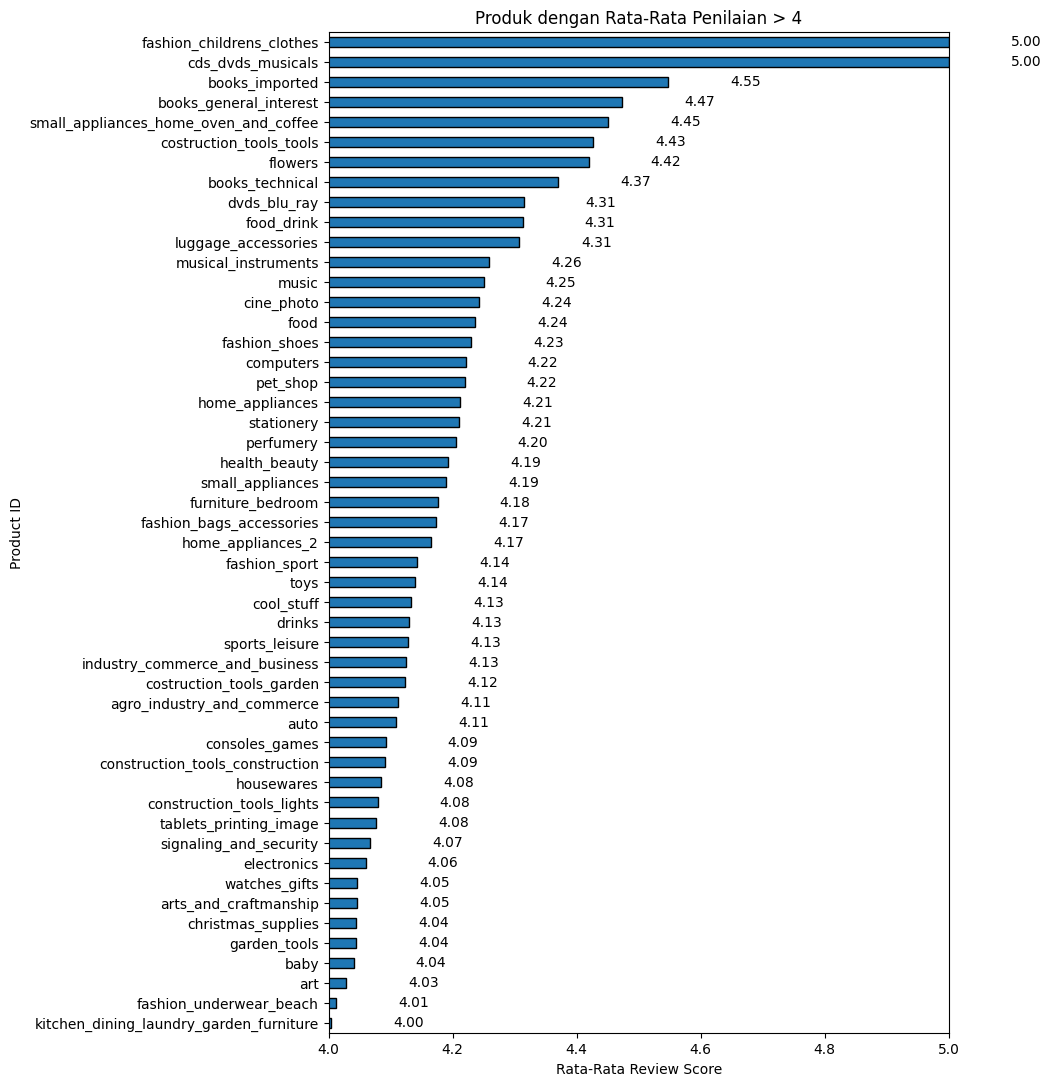

In [53]:
plt.figure(figsize=(8, 13))
ax = highly_rated_products.plot(kind='barh', edgecolor='black')
plt.title('Produk dengan Rata-Rata Penilaian > 4')
plt.xlabel('Rata-Rata Review Score')
plt.ylabel('Product ID')
plt.xlim(4, max(highly_rated_products))
for i, v in enumerate(highly_rated_products):
    ax.text(v + 0.1, i, f'{v:.2f}', color='black', va='center', fontsize=10)
plt.show()

### Pertanyaan 4: Produk apa saja yang rata-rata penilaiannya mendapatkan skor < 4 ?

Memfilter produk dengan rata-rata penilaian < 3 dan Menampilkan produk-produk yang memenuhi kriteria

In [54]:
lowest_rated_products = average_scores[average_scores < 4]
lowest_rated_products = lowest_rated_products.sort_values(ascending=True)

Membuat Grafik

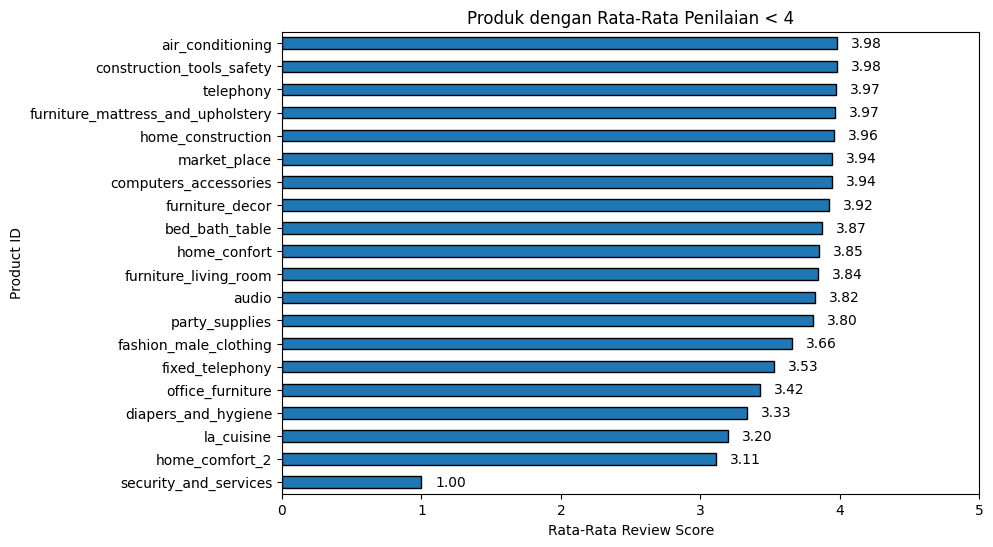

In [55]:
plt.figure(figsize=(9, 6))
ax = lowest_rated_products.plot(kind='barh', edgecolor='black')
plt.title('Produk dengan Rata-Rata Penilaian < 4')
plt.xlabel('Rata-Rata Review Score')
plt.ylabel('Product ID')
plt.xlim(0, 5)
for i, v in enumerate(lowest_rated_products):
    ax.text(v + 0.1, i, f'{v:.2f}', color='black', va='center', fontsize=10)
plt.show()

### Pertanyaan 5: Bagaimana distribusi pelanggan serta segmentasi loyalitas pelanggan yang ada pada Brazilian E-Commerce ini?

Untuk menjawab pertanyaan ini kita akan menggunakan teknik analisus lanjutan yaitu RFM Analysis

#### 5.1.Menggabungkan order_dataset dan order_payment

In [56]:
order_dataset_rfm = order_dataset.copy()
order_dataset_rfm.set_index('order_id', inplace=True)
order_dataset_rfm.head(2)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [57]:
order_payments_rfm = order_payments.copy()
order_payments_rfm.set_index('order_id', inplace=True)
order_payments_rfm.head(2)

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [58]:
db_rfm = order_dataset_rfm.merge(order_payments_rfm, left_index=True, right_index=True, how='outer')
db_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103887 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    103887 non-null  object 
 1   order_status                   103887 non-null  object 
 2   order_purchase_timestamp       103887 non-null  object 
 3   order_approved_at              103712 non-null  object 
 4   order_delivered_carrier_date   101999 non-null  object 
 5   order_delivered_customer_date  100755 non-null  object 
 6   order_estimated_delivery_date  103887 non-null  object 
 7   payment_sequential             103886 non-null  float64
 8   payment_type                   103886 non-null  object 
 9   payment_installments           103886 non-null  float64
 10  payment_value                  103886 non-null  float64
dtypes: float64(3), object(8)
memory usage: 

#### 5.2.Pengecekan kembali missing value dan menghapus missing value

In [59]:
db_rfm.isnull().sum()

customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [60]:
db_rfm.dropna(inplace=True)
db_rfm.isnull().sum()

customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

#### 5.3. Mengubah type data sesuai dengan tipe data yang dibutuhkan

In [61]:
db_rfm[['order_purchase_timestamp',
       'order_approved_at',
       'order_delivered_carrier_date',
       'order_delivered_customer_date',
       'order_estimated_delivery_date']] = db_rfm[['order_purchase_timestamp',
       'order_approved_at',
       'order_delivered_carrier_date',
       'order_delivered_customer_date',
       'order_estimated_delivery_date']].astype('datetime64[ns]')

db_rfm[['payment_sequential', 'payment_installments']] = db_rfm[['payment_sequential', 'payment_installments']].astype('int64')
db_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100739 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    100739 non-null  object        
 1   order_status                   100739 non-null  object        
 2   order_purchase_timestamp       100739 non-null  datetime64[ns]
 3   order_approved_at              100739 non-null  datetime64[ns]
 4   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 5   order_delivered_customer_date  100739 non-null  datetime64[ns]
 6   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 7   payment_sequential             100739 non-null  int64         
 8   payment_type                   100739 non-null  object        
 9   payment_installments           100739 non-null  int64         
 10  payment_value   

#### 5.4.Membuat dataframe final untuk melakukan analisis Recency, Frequency, dan Monetary

In [62]:
rfm = db_rfm[['customer_id', 'order_purchase_timestamp', 'payment_value']].reset_index()
rfm.head(2)

,order_id,customer_id,order_purchase_timestamp,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,259.83


#### 5.5. RECENCY

In [63]:
today = rfm['order_purchase_timestamp'].max() + pd.to_timedelta(1, 'D')
today

Timestamp('2018-08-30 15:00:37')

In [64]:
recency = pd.DataFrame(rfm.groupby(by='customer_id', as_index=False)['order_purchase_timestamp'].max())
recency.rename(columns={'order_purchase_timestamp': 'Last Purchase Date'}, inplace=True)
recency['Recency'] = recency['Last Purchase Date'].apply(lambda x: (today - x).days)
recency

,customer_id,Last Purchase Date,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,288
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,410
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,548
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,379
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,150
...,...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,166
96456,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,153
96457,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,100
96458,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,77


Semakin rendah nilai recency maka semakin baik

#### 5.6.FREQUENCY

In [65]:
frequency = pd.DataFrame(rfm.groupby(by='customer_id', as_index=False)['order_id'].count())
frequency.rename(columns={'order_id': 'Frequency'}, inplace=True)
frequency

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,1
96456,fffecc9f79fd8c764f843e9951b11341,3
96457,fffeda5b6d849fbd39689bb92087f431,1
96458,ffff42319e9b2d713724ae527742af25,1


Semakin tinggi nilai frequency maka semakin baik

#### 5.7.MONETARY

In [66]:
monetary = pd.DataFrame(rfm.groupby(by='customer_id', as_index=False)['payment_value'].sum())
monetary.columns = ['customer_id', 'Monetary']
monetary

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
96456,fffecc9f79fd8c764f843e9951b11341,81.36
96457,fffeda5b6d849fbd39689bb92087f431,63.13
96458,ffff42319e9b2d713724ae527742af25,214.13


Semakin rendah nilai monetary maka semakin baik

#### 5.8.Membuat ringkasan nilai RFM

In [67]:
df_rf = recency.merge(frequency, on='customer_id')
df_rfm = df_rf.merge(monetary, on='customer_id')
df_rfm.drop(columns='Last Purchase Date', inplace=True)
df_rfm

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74
1,000161a058600d5901f007fab4c27140,410,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,548,1,195.42
3,0002414f95344307404f0ace7a26f1d5,379,1,179.35
4,000379cdec625522490c315e70c7a9fb,150,1,107.01
...,...,...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,166,1,91.91
96456,fffecc9f79fd8c764f843e9951b11341,153,3,81.36
96457,fffeda5b6d849fbd39689bb92087f431,100,1,63.13
96458,ffff42319e9b2d713724ae527742af25,77,1,214.13


In [68]:
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,96460.0,240.099844,152.820769,1.00,116.00,221.00,350.00,696.00
Frequency,96460.0,1.044360,0.369635,1.00,1.00,1.00,1.00,26.00
Monetary,96460.0,159.855721,218.828474,9.59,61.88,105.28,176.33,13664.08


#### 5.9.Membuat pengelompokkan/kategori dari setiap nilai R, F, dan M yang telah didapatkan

In [69]:
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else:
        return 5

In [70]:
def m_score(x):
    if x < 50:
        return 1
    elif x < 100:
        return 2
    elif x < 150:
        return 3
    elif x < 200:
        return 4
    else:
        return 5

In [71]:
df_rfm['R Score'] = pd.qcut(x=df_rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
df_rfm['F Score'] = df_rfm['Frequency'].apply(f_score )
df_rfm['M Score'] = x=df_rfm['Monetary'].apply(m_score)

df_rfm = df_rfm[['customer_id', 'Recency', 'R Score', 'Frequency', 'F Score', 'Monetary', 'M Score']]
df_rfm

,customer_id,Recency,R Score,Frequency,F Score,Monetary,M Score
0,00012a2ce6f8dcda20d059ce98491703,288,2,1,1,114.74,3
1,000161a058600d5901f007fab4c27140,410,1,1,1,67.41,2
2,0001fd6190edaaf884bcaf3d49edf079,548,1,1,1,195.42,4
3,0002414f95344307404f0ace7a26f1d5,379,2,1,1,179.35,4
4,000379cdec625522490c315e70c7a9fb,150,4,1,1,107.01,3
...,...,...,...,...,...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,166,4,1,1,91.91,2
96456,fffecc9f79fd8c764f843e9951b11341,153,4,3,3,81.36,2
96457,fffeda5b6d849fbd39689bb92087f431,100,4,1,1,63.13,2
96458,ffff42319e9b2d713724ae527742af25,77,5,1,1,214.13,5


#### 5.10.Menampilkan visualisasi grafik dari masing-masing R, F, dan M yang telah dikategorikan

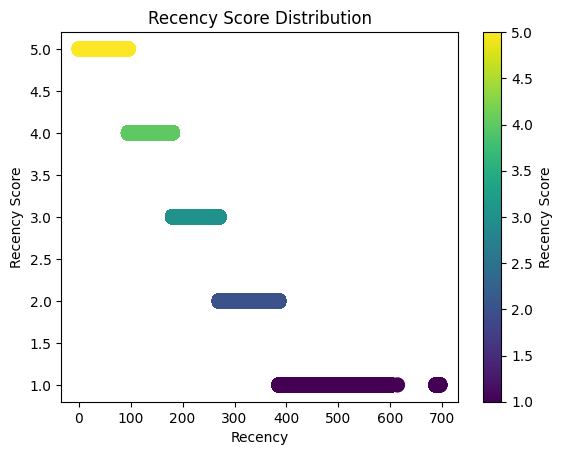

In [72]:
r = df_rfm['Recency']
r_score = df_rfm['R Score']

plt.scatter(r, r_score, s=100, c=r_score)
cbar = plt.colorbar()
cbar.set_label('Recency Score')

plt.title('Recency Score Distribution')
plt.xlabel('Recency')
plt.ylabel('Recency Score')


plt.show()

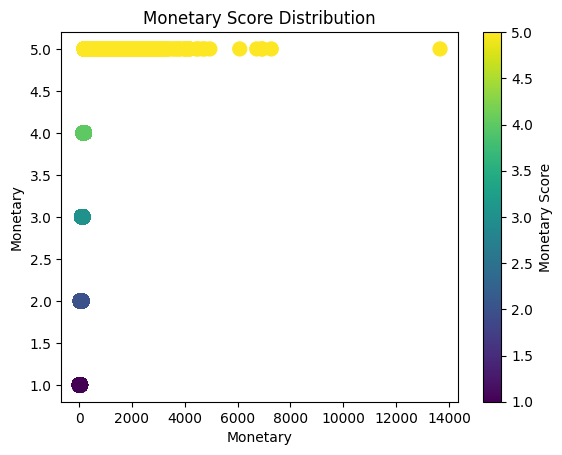

In [73]:
m = df_rfm['Monetary']
m_score = df_rfm['M Score']

plt.scatter(m, m_score, s=100, c=m_score)
cbar = plt.colorbar()
cbar.set_label('Monetary Score')
plt.title('Monetary Score Distribution')
plt.xlabel('Monetary')
plt.ylabel('Monetary')

plt.show()

#### 5.11.Membuat Skor RFM Final masing-masing customer agar bisa dilakukan segmentasi loyalitas pelanggan

In [74]:
df_rfm.dtypes

customer_id      object
Recency           int64
R Score        category
Frequency         int64
F Score           int64
Monetary        float64
M Score           int64
dtype: object

In [75]:
df_rfm['R Score'] = df_rfm['R Score'].astype('int64')
df_rfm.dtypes

customer_id     object
Recency          int64
R Score          int64
Frequency        int64
F Score          int64
Monetary       float64
M Score          int64
dtype: object

In [76]:
df_rfm['RFM Score'] = df_rfm['R Score'].astype(str) + df_rfm['F Score'].astype(str) + df_rfm['M Score'].astype(str)
df_rfm.head()

,customer_id,Recency,R Score,Frequency,F Score,Monetary,M Score,RFM Score
0,00012a2ce6f8dcda20d059ce98491703,288,2,1,1,114.74,3,213
1,000161a058600d5901f007fab4c27140,410,1,1,1,67.41,2,112
2,0001fd6190edaaf884bcaf3d49edf079,548,1,1,1,195.42,4,114
3,0002414f95344307404f0ace7a26f1d5,379,2,1,1,179.35,4,214
4,000379cdec625522490c315e70c7a9fb,150,4,1,1,107.01,3,413


#### 5.12.Menambahkan kolom Segment untuk Segmentasi Pelanggan

In [77]:
df_rfm['Segment'] = df_rfm['R Score'].astype(str) + df_rfm['F Score'].astype(str)
df_rfm.head()

,customer_id,Recency,R Score,Frequency,F Score,Monetary,M Score,RFM Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,288,2,1,1,114.74,3,213,21
1,000161a058600d5901f007fab4c27140,410,1,1,1,67.41,2,112,11
2,0001fd6190edaaf884bcaf3d49edf079,548,1,1,1,195.42,4,114,11
3,0002414f95344307404f0ace7a26f1d5,379,2,1,1,179.35,4,214,21
4,000379cdec625522490c315e70c7a9fb,150,4,1,1,107.01,3,413,41


In [78]:
df_rfm['Segment'].unique()

array(['21', '11', '41', '31', '51', '14', '53', '32', '22', '12', '42',
       '15', '52', '24', '25', '13', '33', '23', '43', '35', '44', '34',
       '54', '45', '55'], dtype=object)

In [79]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Cannot Loose',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

df_rfm['Segment'] = df_rfm['Segment'].replace(segt_map, regex=True)
df_rfm.reset_index(inplace=True)
df_rfm.sample(5)

,index,customer_id,Recency,R Score,Frequency,F Score,Monetary,M Score,RFM Score,Segment
3446,3446,09380077c3400002387e5d72cde34164,17,5,1,1,254.24,5,515,New Customers
89731,89731,edb2388a9a41189e035599ca654a80ba,427,1,1,1,117.46,3,113,Hibernating
79809,79809,d3125b74c9df178912c5f59dc77410fd,170,4,1,1,1037.79,5,415,Promising
15176,15176,28375bf9e4afd28f4c1afc36a544877f,115,4,1,1,53.70,2,412,Promising
10416,10416,1b95bae1b15f09602c5b5046cba2128c,358,2,1,1,222.06,5,215,Hibernating


In [80]:
rfm_final = df_rfm[['customer_id', 'Recency', 'Frequency', 'Monetary', 'Segment']]
rfm_final.sample(5)

,customer_id,Recency,Frequency,Monetary,Segment
64385,aa9a203efa1c66ae5dce0e279ed362f5,565,1,167.63,Hibernating
54049,8fa8552881171e7ce9b050e320e6fcd9,573,1,37.86,Hibernating
31632,5422ef602f244d3374a73946b2077c7b,280,1,293.95,Hibernating
12172,204bbfa4c9b59b50791939141259e2ed,447,1,111.81,Hibernating
42991,7285a211caa6b5708ddbfb01f8987a44,78,1,126.19,New Customers


#### 5.13.Membuat dataframe final hasil segmentasi dan menampilkan visualisasi

In [81]:
df_segt = rfm_final[['customer_id','Segment']].groupby('Segment').agg('count').reset_index()
df_segt.rename(columns={'customer_id': 'Customer Counts'}, inplace=True)
df_segt

,Segment,Customer Counts
0,About To Sleep,19077
1,At Risk,192
2,Cannot Loose,88
3,Champions,38
4,Hibernating,38257
5,Loyal Customers,91
6,Need Attention,51
7,New Customers,18810
8,Potential Loyalists,917
9,Promising,18939


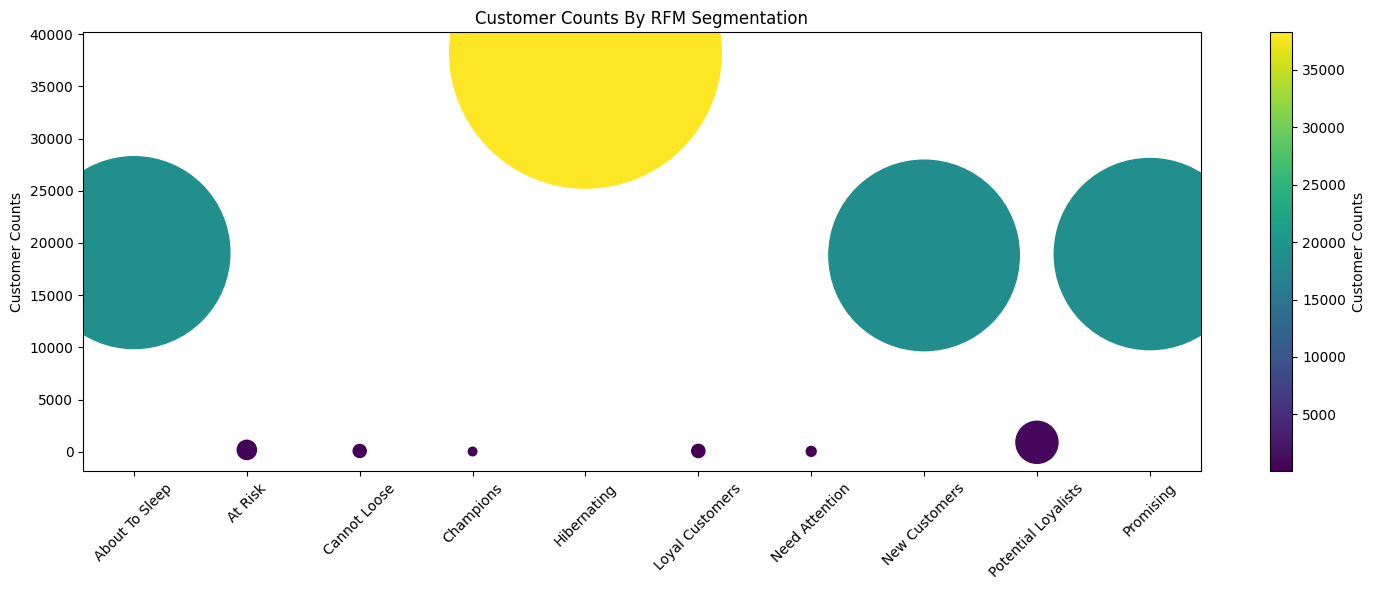

In [82]:
segment = df_segt['Segment']
customer_counts = df_segt['Customer Counts']

fig, ax = plt.subplots(figsize=(15,6))

plt.scatter(segment, customer_counts, s=customer_counts, c=customer_counts)

cbar = plt.colorbar()
cbar.set_label('Customer Counts')

plt.title('Customer Counts By RFM Segmentation')
plt.ylabel('Customer Counts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [83]:
df_segt_sorted = df_segt.sort_values(by='Customer Counts', ascending=True)

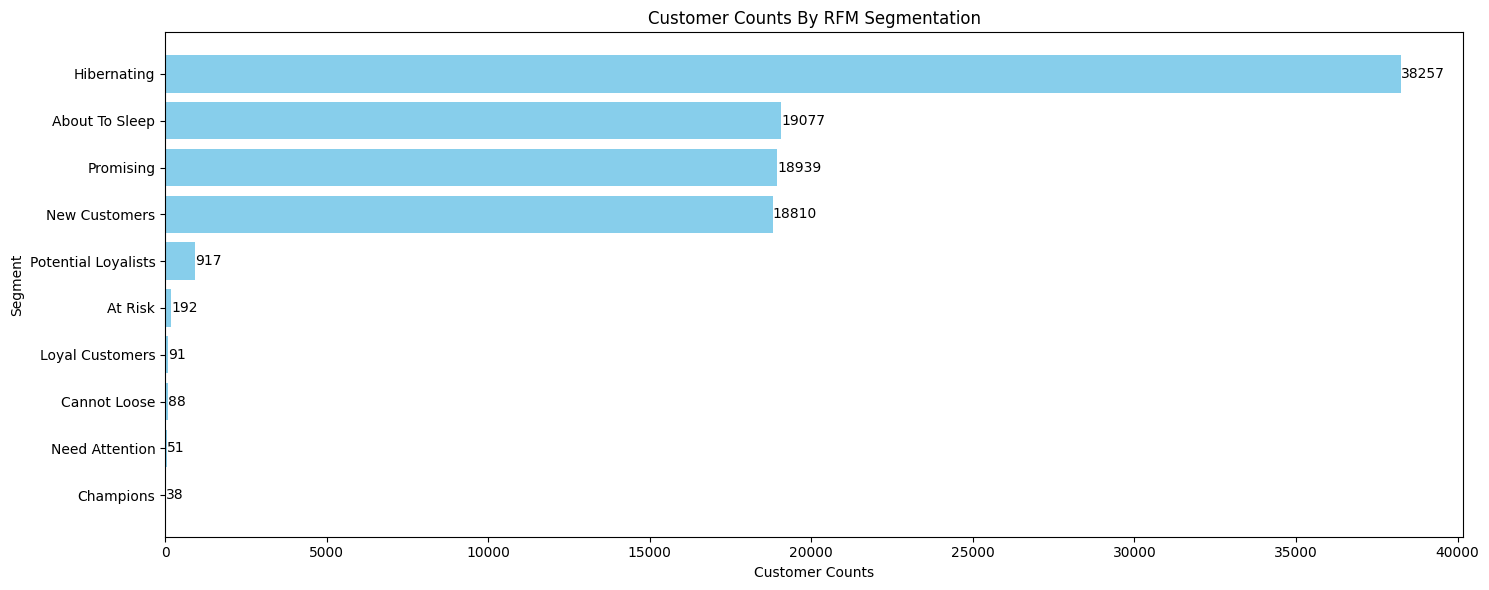

In [84]:
segment = df_segt_sorted['Segment']
customer_counts = df_segt_sorted['Customer Counts']

fig, ax = plt.subplots(figsize=(15,6))

bars = plt.barh(segment, customer_counts, color='skyblue')

plt.title('Customer Counts By RFM Segmentation')
plt.xlabel('Customer Counts')
plt.ylabel('Segment')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

## 6. Conclusion

#### 1. Conclusion dari Pertanyaan 1 : Produk apa yang paling banyak terjual dalam setahun terakhir?

1. Dari data penjualan e-commerce selama satu tahun terakhir, terlihat bahwa ada 10 kategori produk yang paling diminati oleh pelanggan. Setelah melakukan analisis lebih mendalam, kita dapat menggolongkan kategori-kategori tersebut menjadi dua kelompok utama:

1. Peralatan Rumah:

Kategori "Bed & Bath," "Furniture & Decor," dan "Housewares" membentuk kelompok Peralatan Rumah yang sangat diminati, dengan total penjualan mencapai 19,664. Kategori ini mencakup beragam produk yang terkait dengan perabotan dan peralatan rumah tangga.

2. Elektronik dan Telekomunikasi:

Kategori "Computers & Accessories" dan "Telephony" memiliki total penjualan yang signifikan sepanjang tahun ini, mencapai total penjualan sebesar 9,352. Produk dalam kelompok ini meliputi berbagai perangkat elektronik dan telekomunikasi yang penting dalam kehidupan sehari-hari pelanggan.

Kesimpulan ini menunjukkan bahwa selama tahun terakhir, konsumen cenderung memprioritaskan produk dalam kategori Peralatan Rumah serta Elektronik dan Telekomunikasi saat berbelanja di e-commerce. Hal ini memberikan wawasan berharga tentang preferensi pelanggan dan dapat membantu pedagang e-commerce untuk menyesuaikan penawaran produk mereka sesuai dengan permintaan yang kuat dalam kedua kategori ini.

#### 2. Conclusion dari Pertanyaan 2 : Customer dari 'State' manakah yang melakukan pembelian terbanyak dalam setahun terakhir?

Berdasarkan data bahwa pelanggan paling banyak terdapat di São Paulo (SP), dapat disusun beberapa analisis lebih lanjut mengapa hal ini terjadi. Beberapa faktor yang mungkin memengaruhi tingginya jumlah pelanggan di São Paulo antara lain:

1. Kepadatan Penduduk yang Tinggi: São Paulo adalah salah satu negara bagian paling padat penduduk di Brasil. Kepadatan penduduk yang tinggi dapat menciptakan permintaan yang tinggi untuk berbelanja online, karena lebih banyak orang yang tinggal di area yang relatif kecil.

2. Ekonomi yang Kuat: São Paulo merupakan pusat ekonomi dan bisnis di Brasil, yang berarti banyak penduduknya memiliki daya beli yang tinggi dan lebih mampu untuk berbelanja secara online.

3. Teknologi Informasi yang Maju: São Paulo adalah pusat teknologi informasi dan inovasi di Brasil. Lebih banyak orang di São Paulo mungkin lebih akrab dengan teknologi dan lebih mungkin untuk melakukan pembelian online.

4. Promosi dan Penawaran Spesifik: Bisnis e-commerce mungkin melakukan promosi dan penawaran khusus yang lebih ditargetkan kepada pelanggan di São Paulo, yang dapat meningkatkan minat mereka dalam berbelanja online.

Dengan demikian, kesimpulan adalah bahwa São Paulo memiliki kombinasi dari faktor-faktor seperti kepadatan penduduk yang tinggi, tingkat urbanisasi, daya beli yang kuat, kemajuan teknologi informasi, serta promosi dan penawaran yang dapat menjadikan wilayah ini sebagai pemimpin dalam hal jumlah pelanggan e-commerce. Hal ini memberikan wawasan berharga bagi bisnis e-commerce untuk terus berfokus pada pelanggan di wilayah ini dan merencanakan strategi pemasaran yang sesuai.

#### Conclusion dari Pertanyaan 3 : Produk apa saja yang rata-rata penilaiannya mendapatkan skor > 4?

Dalam analisis produk dengan skor ulasan (review score) lebih dari 4, terdapat beberapa temuan yang menarik:

- Produk dengan Skor Ulasan Tertinggi (> 4):

Kategori produk dengan skor rata-rata tertinggi adalah "cds_dvds_musicals" dan "fashion_childrens_clothes," masing-masing dengan skor ulasan 5.00.
Produk-produk dalam kategori "books_imported" mendapatkan skor ulasan yang sangat tinggi, lebih dari 4.5.

- Kesimpulan dari Analisis:

Kategori "cds_dvds_musicals" dan "fashion_childrens_clothes" adalah yang paling mendominasi dalam hal skor ulasan dengan skor sempurna 5.00. Ini menandakan tingkat kepuasan pelanggan yang sangat tinggi terhadap produk-produk dalam kategori ini.
Ada kategori produk lainnya, seperti "books_imported" yang juga mendapat skor ulasan yang sangat tinggi, menunjukkan bahwa produk-produk buku memiliki reputasi yang baik di antara pelanggan.

- Analisis tentang Ironi Produk "bed_bath_table":

Terdapat sebuah ironi bahwa kategori produk "bed_bath_table" adalah yang paling banyak diorder selama satu tahun terakhir, tetapi produk dalam kategori ini tidak mendapatkan skor ulasan minimal 4.00. Hal ini mengindikasikan bahwa meskipun produk tersebut diminati dari segi penjualan, mungkin ada aspek kualitas atau kepuasan pelanggan yang perlu diperbaiki.

Ironi ini dapat disebabkan oleh berbagai faktor, seperti perbedaan antara ekspektasi pelanggan dan realitas produk, atau adanya masalah kualitas dalam kategori produk ini. Mungkin juga terdapat aspek lain, seperti harga yang kompetitif atau promosi khusus, yang menjadikan produk ini sangat diminati dari segi penjualan meskipun mendapatkan skor ulasan yang lebih rendah.

- Hubungan dengan Analisis Pertanyaan Sebelumnya:

Analisis ini tentang skor ulasan produk memberikan wawasan lebih dalam tentang preferensi pelanggan terhadap kualitas produk. Meskipun "bed_bath_table" adalah yang paling banyak diorder, kualitas produk dalam kategori ini tidak mencapai standar tinggi yang tercermin dalam skor ulasan.
Sebaliknya, produk dalam kategori "cds_dvds_musicals" dan "fashion_childrens_clothes," meskipun tidak masuk dalam 10 besar dalam penjualan, mendapat skor ulasan sempurna, menunjukkan bahwa kualitas produk dalam kategori ini sangat baik dan pelanggan sangat puas.

- Kesimpulan akhir

kualitas produk sangat penting dalam mempertahankan kepuasan pelanggan, meskipun faktor lain seperti promosi dan harga juga dapat memengaruhi penjualan. Analisis ini dapat membantu e-commerce dalam meningkatkan kualitas produk dalam kategori-kategori yang memiliki potensi penjualan tinggi dan memahami preferensi pelanggan yang lebih mendalam.

#### Conclusion dari Pertanyaan 4 : Produk apa saja yang rata-rata penilaiannya mendapatkan skor < 4?

Dalam analisis produk dengan skor ulasan (review score) kurang dari 4, terdapat beberapa temuan yang menarik:

- Produk dengan Skor Ulasan di Bawah 4:

Kategori produk "security_and_services" adalah satu-satunya kategori yang mendapatkan skor ulasan 1.00, yang menunjukkan bahwa produk dalam kategori ini mendapat ulasan sangat negatif yang mengindikasikan tingkat ketidakpuasan pelanggan yang sangat tinggi terhadap produk dalam kategori ini. Perlu dilakukan tindakan perbaikan yang mendalam dan analisis yang lebih mendalam untuk memahami alasan di balik ulasan yang sangat negatif ini.

- Ironi Produk "bed_bath_table":

Terdapat ironi bahwa kategori produk "bed_bath_table" adalah yang paling banyak diorder selama satu tahun terakhir, tetapi produk dalam kategori ini mendapatkan skor ulasan di bawah 4.00. Ini menunjukkan bahwa meskipun produk ini diminati dari segi penjualan, kualitas produk dalam kategori ini tidak mencapai standar tinggi yang tercermin dalam skor ulasan.
Sebaiknya dilakukan analisis sentimen (sentiment analysis) untuk lebih memahami pandangan pelanggan terhadap produk dalam kategori "bed_bath_table." Skor ulasan kurang dari 4 menunjukkan ketidakpuasan pelanggan, dan analisis sentimen dapat memberikan wawasan lebih dalam tentang masalah yang mungkin ada dalam produk ini.

#### Conclusion dari Pertanyaan 5 : Bagaimana distribusi pelanggan serta segmentasi loyalitas pelanggan yang ada pada Brazilian E-Commerce ini?


Hasil dari segmentasi pelanggan di e-commerce ini memberikan wawasan yang berharga tentang perilaku pelanggan dan membantu dalam memahami bagaimana mengelompokkan pelanggan ke dalam segmen-segmen yang berbeda. Berikut adalah analisis dan kesimpulan dari hasil segmentasi pelanggan:

- About To Sleep :

Terdapat 19,077 pelanggan dalam segmen ini. Ini mungkin merupakan kelompok pelanggan yang telah aktif, tetapi kehilangan minat dalam berbelanja. Mungkin perlu dilakukan strategi khusus untuk mempertahankan pelanggan ini atau mendorong mereka untuk melakukan pembelian lagi.Strategi perawatan/perlakuan khusus mungkin dapat membantu mempertahankan dan meraih kembali minat mereka.

- At Risk :

Hanya terdapat 192 pelanggan dalam segmen ini. Ini adalah segmen yang perlu mendapat perhatian khusus karena mereka mungkin telah menunjukkan tanda-tanda berisiko atau berkurangnya aktivitas belanja. Mungkin diperlukan upaya untuk meraih kembali minat mereka dalam berbelanja.

- Cannot Loose :

Dengan hanya 88 pelanggan, segmen ini mungkin adalah kelompok yang memiliki loyalitas tinggi terhadap e-commerce ini dan harus dijaga dengan baik.

- Champions :

Meskipun jumlahnya hanya 38 pelanggan, segmen ini mungkin adalah pelanggan yang paling berharga karena mereka adalah pelanggan setia yang sangat aktif dalam berbelanja. Ini adalah segmen yang perlu diberi perhatian khusus dan mungkin mendapatkan insentif khusus.

- Hibernating :

Dengan 38,257 pelanggan, segmen ini mungkin adalah yang paling besar. Ini adalah pelanggan yang telah lama tidak aktif dalam berbelanja. Upaya harus dilakukan untuk membangunkan minat mereka kembali atau mengaktifkan mereka kembali sebagai pelanggan aktif.

- Loyal Customers :

Terdapat 91 pelanggan dalam segmen ini. Meskipun jumlahnya kecil, ini adalah pelanggan setia yang harus dijaga dan mungkin mendapatkan perlakuan istimewa.

- Need Attention :

Dengan 51 pelanggan, segmen ini mungkin menunjukkan tanda-tanda berisiko. Mereka perlu perhatian khusus dan strategi untuk memulihkan minat mereka dalam berbelanja.

- New Customers :

Terdapat 18,810 pelanggan dalam segmen ini. Ini mungkin adalah pelanggan yang baru saja bergabung, dan perlu dilakukan upaya untuk memastikan bahwa mereka memiliki pengalaman yang baik dan terus berbelanja di masa depan.

- Potential Loyalists :

Dengan 917 pelanggan, segmen ini mungkin adalah calon pelanggan yang menunjukkan potensi menjadi pelanggan setia. Mereka perlu diberikan perhatian khusus dan insentif untuk membangun loyalitas mereka.

- Promising :

Terdapat 18,939 pelanggan dalam segmen ini. Ini adalah segmen yang menunjukkan potensi pertumbuhan dalam aktivitas berbelanja. Perlu strategi untuk menjadikan mereka pelanggan setia.

---
---
---
# SELESAI

